# K-Means Clustering on the Iris Dataset

In this task, we apply **K-Means Clustering** to group flowers in the **Iris dataset** into clusters.  
Unlike supervised learning, clustering is **unsupervised** — the algorithm does **not use labels** to form groups.  
Our goal: See how well K-Means can find natural groupings in the data.


In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

## Step 1: Load & Scale Data
We first load the Iris dataset (150 flowers, 4 features: sepal length, sepal width, petal length, petal width).  
Because K-Means uses **Euclidean distance**, features with larger ranges can dominate clustering.  
So we use **StandardScaler** to standardize each feature:

$$
X' = \frac{X - \mu}{\sigma}
$$
This ensures all features have a **mean = 0** and **standard deviation = 1**, giving them equal importance.

In [5]:
# Step 1: Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 2: Elbow Method for Choosing k
K-Means requires us to choose **k (the number of clusters)**.  
To find a good k, we use the **Elbow Method**:
- Run K-Means for k = 1 to 10.
- For each k, calculate **WCSS** (Within-Cluster Sum of Squares) — how close points are to their cluster centers.
- Plot k vs WCSS.  
The "elbow" point — where the drop in WCSS slows — suggests the optimal k.  
For the Iris dataset, we expect the elbow around **k = 3** (since there are 3 flower species).



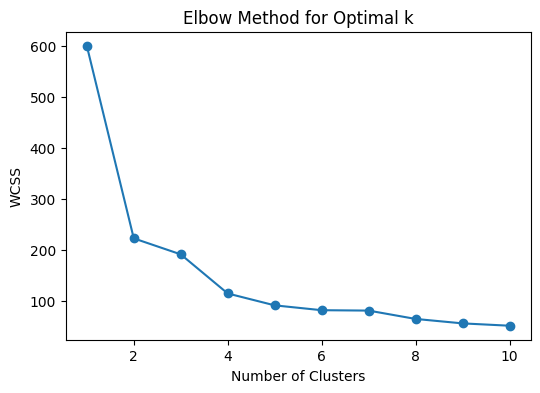

In [2]:
# Step 2: Elbow Method for Choosing k
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Step 3: Silhouette Score
To confirm our choice of k, we use the **Silhouette Score**:
- Measures how well each point fits within its cluster compared to other clusters.
- Ranges:
  - **Close to 1:** Well-separated clusters.
  - **Around 0:** Overlapping clusters.
  - **Negative:** Wrong clustering.
We compute this for different k values.  
The **highest score** indicates the best cluster separation.

In [7]:
# Step 3: Silhouette Score
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"k={k}, silhouette score={score:.3f}")


k=2, silhouette score=0.582
k=3, silhouette score=0.480
k=4, silhouette score=0.385
k=5, silhouette score=0.345
k=6, silhouette score=0.334


## Step 4: Fit K-Means with Optimal k
Once we determine k (for Iris, likely 3), we run K-Means:
- **fit:** K-Means starts by randomly placing k cluster centers (centroids).
- It iteratively:
  - Assigns each point to the **nearest centroid**.
  - Moves the centroids to the **mean of their assigned points**.
- This repeats until the centroids **stop moving significantly** (convergence).
- The result: Each flower gets a **cluster label (0, 1, or 2)**.

In [6]:
# Step 4: Fit K-Means with Optimal k (we'll use 3)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


## Step 5: Visualize Clusters using PCA
Iris has 4 features (4D data), but we can’t visualize 4D easily.  
We use **PCA (Principal Component Analysis)** to reduce it to 2D while preserving as much variance as possible.  
Then we plot the points:
- Each point = a flower.
- Color = cluster label (0, 1, 2).
This gives a visual sense of how well the clusters are separated.

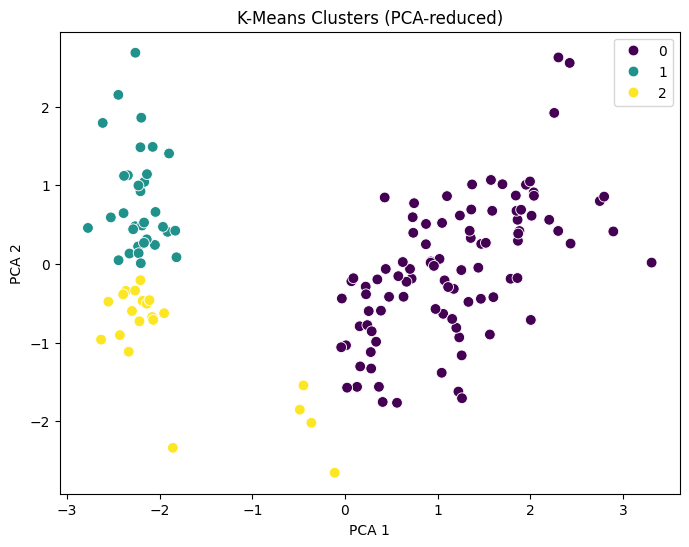

In [8]:
# Step 5: Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_kmeans, palette='viridis', s=60)
plt.title("K-Means Clusters (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## Step 6: Compare with Actual Labels
Even though clustering is unsupervised, we can **compare clusters with actual species** to see how well K-Means grouped them.  
We use the **Adjusted Rand Index (ARI)**:
- **ARI = 1.0:** Perfect match with actual labels.
- **ARI ≈ 0:** Clustering is random.
This tells us how closely K-Means clusters match the true Iris species.

In [9]:
# Step 6: Compare with Actual Labels (Adjusted Rand Index)
ari = adjusted_rand_score(iris.target, y_kmeans)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.43


## Key Takeaways
- K-Means effectively grouped the Iris dataset into **3 clusters**.
- The **Elbow Method** and **Silhouette Score** helped us determine the best number of clusters.
- **PCA visualization** made the clusters easy to interpret in 2D space.
- **ARI score** confirmed how well our clusters align with actual species.
